 ## - **BASIC LIBRARIES :-**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

## -**PREPROCESSING & FEATURE ENGINEERING LIBRARIES** :-

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency

 ## -  **MODEL&EVALUATION LIBRARIES :-**

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc 
warnings.filterwarnings("ignore")
!pip install lightgbm

## - **SAVING MODELS LIBRARIES  :-**

In [5]:
import joblib
import cloudpickle

In [6]:
    # LOAD  TRAIN  DATA
train_data = pd.read_csv("aug_train.csv")
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [7]:
    # LOAD  TEST  DATA
test_data = pd.read_csv("aug_test.csv")
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [8]:
     
def encode_experience(df):
    df = df.copy()
    exp_mapping = {"<1": 0, ">20": 21}
    job_mapping = {"never": 0, ">4": 5}
    df['experience'] = df['experience'].replace(exp_mapping)
    df['last_new_job'] = df['last_new_job'].replace(job_mapping)
    df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
    df['last_new_job'] = pd.to_numeric(df['last_new_job'], errors='coerce')
    return df
  #Standard encoders might treat ">20" as a random category,
  #but we need the model to know that 21 is greater than 10. 
  #errors='coerce':- it ensures that unexpected test values are turned in to NAN.

In [9]:
def clean_feature_names(df):
    df = df.copy()
    df.columns = (df.columns.str.replace('[', '', regex=False).str.replace(']', '', regex=False)
                  .str.replace('<', 'less_', regex=False).str.replace('>', 'greater_', regex=False)
                  .str.replace('/', '_', regex=False).str.replace(' ', '_', regex=False))
    return df
    # This function removes or renames
   # special characters  or math symbols to avoid syntax error in models.

   ##  **PREPROCESSING** :-

In [10]:

train_df = encode_experience(train_data)
train_df.drop(columns=["enrollee_id", "city"], inplace=True, errors="ignore")
    #It helps to prevent the model from overfitting on noise.

## **Feature Separation**:-

In [11]:
X = train_df.drop(columns=["target"])
y = train_df["target"]
 #Independent variables (features) into X.
 #The dependent variable (target) into y.

In [12]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
num_features
#grouping variables into numerical

Index(['city_development_index', 'experience', 'last_new_job',
       'training_hours'],
      dtype='object')

In [13]:
cat_features = X.select_dtypes(include=['object']).columns
cat_features
    #grouping variables into categorical

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [14]:
for col in X.columns:
    X[col] = (
        X[col]
        .astype(str)
        .str.replace('<', 'less_', regex=False)
        .str.replace('>', 'greater_', regex=False).str.replace('never', '0', regex=False)
        .str.replace('+', '', regex=False).str.replace(' ', '_', regex=False))

In [15]:
   # Split before fitting transformers to prevent leakage
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **IMPUTATION & ENCODING (Fitted only on Train)** :-

## **Simple Imputer** :-

In [16]:
cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer
   #fills in missing values,using the 'mode'—the most frequent category,
   #you cannot calculate a mean or median for categorical data.

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [17]:
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_train[cat_features]

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
17855,nan,Has_relevent_experience,no_enrollment,Graduate,STEM,50-99,Pvt_Ltd
17664,Male,No_relevent_experience,no_enrollment,Primary_School,nan,nan,nan
13404,Male,Has_relevent_experience,no_enrollment,Graduate,STEM,1000-4999,NGO
13366,Male,Has_relevent_experience,no_enrollment,Graduate,STEM,100-500,Funded_Startup
15670,Female,Has_relevent_experience,Full_time_course,Graduate,STEM,nan,nan
...,...,...,...,...,...,...,...
10398,nan,Has_relevent_experience,no_enrollment,Graduate,STEM,50-99,Pvt_Ltd
859,Female,Has_relevent_experience,no_enrollment,Masters,STEM,50-99,Pvt_Ltd
10566,Female,Has_relevent_experience,no_enrollment,Masters,STEM,100-500,Pvt_Ltd
3085,Female,Has_relevent_experience,no_enrollment,Graduate,STEM,10/49,Funded_Startup


In [18]:
X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
X_val[cat_features]

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
686,nan,Has_relevent_experience,no_enrollment,Graduate,STEM,1000-4999,Pvt_Ltd
1106,Female,No_relevent_experience,Full_time_course,Graduate,STEM,nan,nan
8966,nan,Has_relevent_experience,no_enrollment,High_School,nan,less_10,Pvt_Ltd
7961,nan,Has_relevent_experience,no_enrollment,Graduate,STEM,1000-4999,Public_Sector
5182,Male,Has_relevent_experience,no_enrollment,Graduate,STEM,nan,nan
...,...,...,...,...,...,...,...
9055,Male,No_relevent_experience,no_enrollment,Graduate,STEM,nan,nan
11207,nan,Has_relevent_experience,Full_time_course,Graduate,STEM,10000,Pvt_Ltd
16790,Male,No_relevent_experience,no_enrollment,Graduate,STEM,500-999,Public_Sector
5575,Male,No_relevent_experience,Full_time_course,High_School,nan,10000,nan


## **Iterative Imputer** :-

In [19]:
num_imputer = IterativeImputer(random_state=42)
num_imputer 
#fill missing numerical values by looking at the patterns and correlations in other available features,
#providing much higher accuracy than simple mean or median filling."

,estimator,None
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


In [20]:
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_train[num_features] 

,city_development_index,experience,last_new_job,training_hours
17855,0.624,10.0,1.0,90.0
17664,0.920,5.0,0.0,15.0
13404,0.896,12.0,5.0,36.0
13366,0.920,5.0,1.0,53.0
15670,0.855,5.0,1.0,158.0
...,...,...,...,...
10398,0.855,13.0,1.0,94.0
859,0.920,10.0,1.0,16.0
10566,0.893,14.0,1.0,34.0
3085,0.624,15.0,2.0,112.0


In [21]:
X_val[num_features] = num_imputer.transform(X_val[num_features])
X_val[num_features]
    #applies the learned imputation logic from the training set to the validation set.

,city_development_index,experience,last_new_job,training_hours
686,0.939,12.0,1.000000,42.0
1106,0.698,2.0,0.000000,18.0
8966,0.939,5.0,1.467512,22.0
7961,0.840,10.0,1.000000,78.0
5182,0.624,21.0,5.000000,78.0
...,...,...,...,...
9055,0.920,3.0,1.000000,184.0
11207,0.666,21.0,1.000000,8.0
16790,0.920,15.0,3.000000,286.0
5575,0.939,2.0,0.000000,204.0


## **OneHotEncoder** :-

In [22]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder
    # One-Hot Encoding, which converts categorical text data into binary (0 or 1) columns
    #so that the machine can understand.

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [23]:
train_encoded = encoder.fit_transform(X_train[cat_features])
train_encoded
    # applies One-Hot Encoding to the training data
    # transforming categorical text labels into a numerical

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [24]:
val_encoded = encoder.transform(X_val[cat_features])
val_encoded
     #ensuring that both datasets share the exact same column structure and binary mappings.

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

  ##  **Merge and Clean**:-

In [25]:
X_train_final = pd.concat([X_train[num_features], pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(), index=X_train.index)], axis=1)
X_train_final

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
17855,0.624,10.0,1.0,90.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17664,0.920,5.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13404,0.896,12.0,5.0,36.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13366,0.920,5.0,1.0,53.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15670,0.855,5.0,1.0,158.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,0.855,13.0,1.0,94.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
859,0.920,10.0,1.0,16.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10566,0.893,14.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3085,0.624,15.0,2.0,112.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_val_final = pd.concat([X_val[num_features], pd.DataFrame(val_encoded, columns=encoder.get_feature_names_out(), index=X_val.index)], axis=1)
X_val_final
    # merging the imputed numerical columns and the encoded categorical columns back into a single DataFrame.

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
686,0.939,12.0,1.000000,42.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1106,0.698,2.0,0.000000,18.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8966,0.939,5.0,1.467512,22.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7961,0.840,10.0,1.000000,78.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5182,0.624,21.0,5.000000,78.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,0.920,3.0,1.000000,184.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11207,0.666,21.0,1.000000,8.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16790,0.920,15.0,3.000000,286.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5575,0.939,2.0,0.000000,204.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
X_train_final = clean_feature_names(X_train_final)
X_train_final 
    #removing special characters from column names

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
17855,0.624,10.0,1.0,90.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17664,0.920,5.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13404,0.896,12.0,5.0,36.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13366,0.920,5.0,1.0,53.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15670,0.855,5.0,1.0,158.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,0.855,13.0,1.0,94.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
859,0.920,10.0,1.0,16.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10566,0.893,14.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3085,0.624,15.0,2.0,112.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_val_final = clean_feature_names(X_val_final)
X_val_final
    # removing special characters from column names from val set.

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
686,0.939,12.0,1.000000,42.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1106,0.698,2.0,0.000000,18.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8966,0.939,5.0,1.467512,22.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7961,0.840,10.0,1.000000,78.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5182,0.624,21.0,5.000000,78.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,0.920,3.0,1.000000,184.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11207,0.666,21.0,1.000000,8.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16790,0.920,15.0,3.000000,286.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5575,0.939,2.0,0.000000,204.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
     # Check for missing values in the processed training data
missing_counts = pd.DataFrame(X_train_final).isnull().sum()
print("Missing values per column after preprocessing:")
print(missing_counts[missing_counts > 0])

     # If the output is empty, it means 0 missing values exist!

Missing values per column after preprocessing:
Series([], dtype: int64)


##  **SCALING & BALANCING (SMOTE)** :-

In [30]:
scaler = StandardScaler()
X_train_final[num_features] = scaler.fit_transform(X_train_final[num_features])
X_val_final[num_features] = scaler.transform(X_val_final[num_features])
scaler
    #Feature Scaling by standardizing numerical variables to a mean of 0 and a standard deviation of 1,
    #ensuring that features with large ranges (like training_hours) do not disproportionately dominate the model's weight calculations."

,copy,True
,with_mean,True
,with_std,True


In [31]:
chi_square_results = []

for feature in cat_features:
    contingency_table = pd.crosstab(train_data[feature],train_data["target"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    chi_square_results.append({
        "Feature": feature,
        "Chi-Square Value": chi2,
        "p-value": p
    })

chi_square_train_data = pd.DataFrame(chi_square_results)
chi_square_train_data.sort_values("p-value")
# Chi-Square test to determine which categorical variables have a significant relationship with the target variable


,Feature,Chi-Square Value,p-value
2,enrolled_university,455.166762,1.451421e-99
1,relevent_experience,315.338577,1.500663e-70
3,education_level,165.655389,8.949048e-35
5,company_size,45.531755,1.078133e-07
6,company_type,35.035475,1.480320e-06
0,gender,9.042182,1.087715e-02
4,major_discipline,12.207121,3.205736e-02


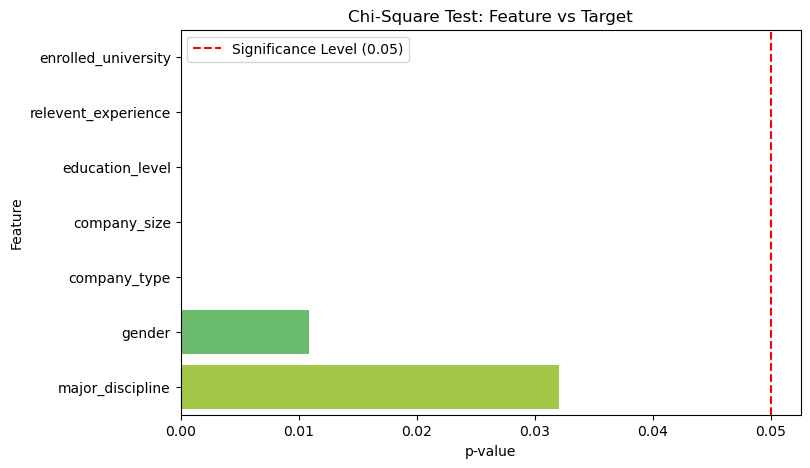

In [32]:

plt.figure(figsize=(8,5))

sns.barplot(
    data=chi_square_train_data.sort_values("p-value"),
    x="p-value",
    y="Feature",
    palette="viridis"
)

plt.axvline(0.05, color="red", linestyle="--", label="Significance Level (0.05)")
plt.title("Chi-Square Test: Feature vs Target")
plt.xlabel("p-value")
plt.ylabel("Feature")
plt.legend()
plt.show()

## **SMOTE** :-

In [33]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_final, y_train)
smote 
     #Over-sampling (SMOTE) to fix the class imbalance problem seen in your earlier charts by creating artificial data points for the minority class ('Job Leavers')."
     #your y_train_sm will have an equal number of '0s' and '1s'. This prevents the model from being biased toward the majority class.

  File "C:\Users\Vedanthi BhargavI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Vedanthi BhargavI\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vedanthi BhargavI\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\U

,sampling_strategy,'auto'
,random_state,42
,k_neighbors,5


 ## **Check Balance Before SMOTE** :-

--- Before SMOTE ---
target
0.0    11504
1.0     3822
Name: count, dtype: int64

--- After SMOTE ---
target
0.0    11504
1.0    11504
Name: count, dtype: int64


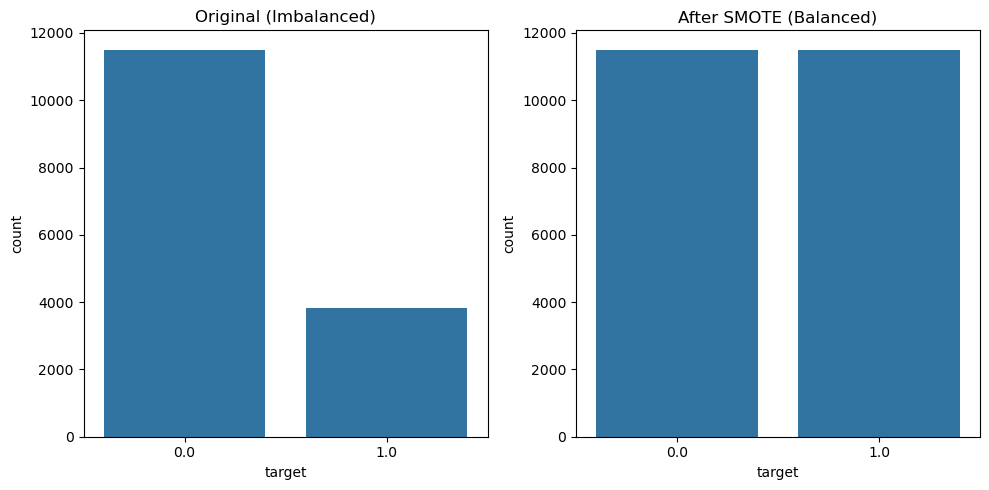

In [34]:
print("--- Before SMOTE ---")
print(y_train.value_counts())

    # Check Balance AFTER SMOTE
print("\n--- After SMOTE ---")
y_train_sm_series = pd.Series(y_train_sm) # Convert to series if it's a numpy array
print(y_train_sm_series.value_counts())

   # Visualizing the difference
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original (Imbalanced)")

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_sm)
plt.title("After SMOTE (Balanced)")

plt.tight_layout()
plt.show()

##   **TRAIN BALANCED MODELS** :-

## **Logistic Regression** :-

In [35]:
best_lr = LogisticRegression(C=0.1, solver='liblinear', random_state=42).fit(X_train_sm, y_train_sm)
best_lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [36]:
best_lr.fit(X_train_final, y_train)
best_lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [37]:
y_pred = best_lr.predict(X_val_final)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [38]:
# Class labels (0 or 1)
y_prob = best_lr.predict_proba(X_val_final)[:, 1] # Probabilities for ROC curve
y_prob

array([0.08640221, 0.74142527, 0.03403007, ..., 0.13040634, 0.07490329,
       0.06791519])

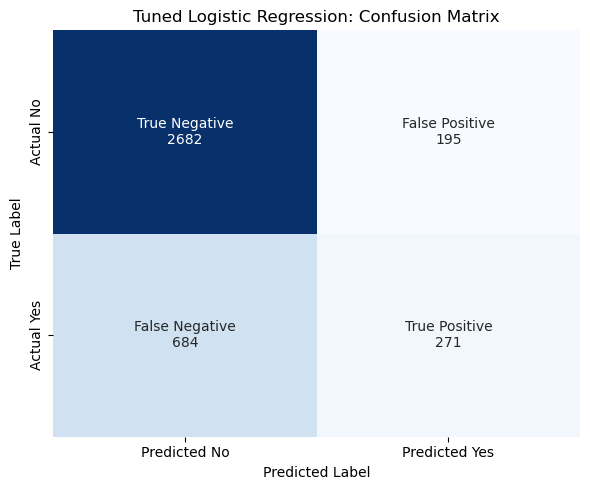

In [39]:
    # Confusion matrix
cm = confusion_matrix(y_val, y_pred)

    # Labels for each cell
labels = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])

    # Combine counts and labels
annot_labels = np.array([ [f'{labels[i,j]}\n{cm[i,j]}' for j in range(2)] for i in range(2)])
plt.figure(figsize=(6, 5))
sns.heatmap(cm,annot=annot_labels,fmt='', cmap='Blues', cbar=False, xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])

plt.title('Tuned Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [40]:
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99617657, 0.99617657,
        1.        ]),
 array([0.        , 0.00104712, 0.00314136, ..., 0.99895288, 1.        ,
        1.        ]),
 array([       inf, 0.92511054, 0.8719047 , ..., 0.02692855, 0.02664229,
        0.01824122]))

In [41]:

roc_auc = auc(fpr, tpr)
roc_auc 

0.7883439155461169

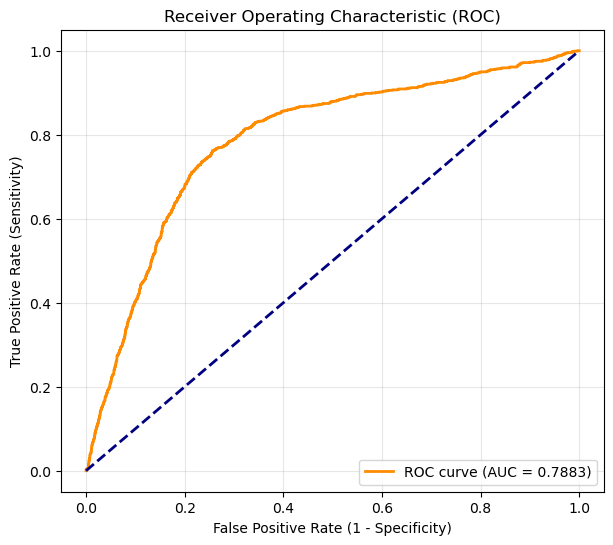

In [42]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## **Classification Report**:-

In [43]:
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2877
         1.0       0.58      0.28      0.38       955

    accuracy                           0.77      3832
   macro avg       0.69      0.61      0.62      3832
weighted avg       0.74      0.77      0.74      3832



##  **Random Forest** :-

In [44]:
best_rf = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf=25, random_state=42).fit(X_train_sm, y_train_sm)
best_rf

,n_estimators,200
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
   # 1. Define the Parameter Grid for Tuning
   # We focus on preventing overfitting by limiting depth and requiring more samples per leaf
param_grid_rf = {'n_estimators': [100, 200],'max_depth': [6, 8, 10],'min_samples_leaf': [20, 50],'criterion': ['gini', 'entropy']}
param_grid_rf

{'n_estimators': [100, 200],
 'max_depth': [6, 8, 10],
 'min_samples_leaf': [20, 50],
 'criterion': ['gini', 'entropy']}

In [46]:
   # 2. Initialize and Run GridSearch
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_base

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
grid_rf = GridSearchCV(rf_base, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [6, 8, ...], 'min_samples_leaf': [20, 50], 'n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [48]:
grid_rf.fit(X_train_final, y_train)
grid_rf

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [6, 8, ...], 'min_samples_leaf': [20, 50], 'n_estimators': [100, 200]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [49]:
   # 3. Get the Best Model
best_rf = grid_rf.best_estimator_
best_rf

,n_estimators,200
,criterion,'entropy'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_pred_rf = best_rf.predict(X_val_final)
y_pred_rf

array([0., 1., 0., ..., 0., 0., 0.])

In [51]:
y_prob_rf = best_rf.predict_proba(X_val_final)[:, 1]
y_prob_rf

array([0.22923123, 0.79828497, 0.21294371, ..., 0.35310605, 0.31537029,
       0.1814993 ])

 ## **EVALUATION** :-

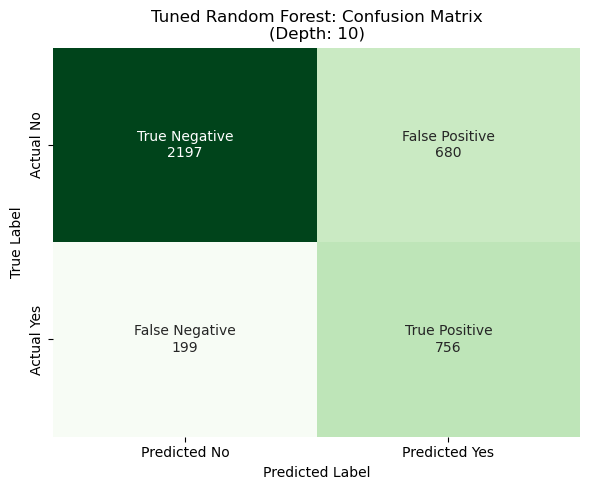

In [52]:
   # Confusion matrix
cm_rf = confusion_matrix(y_val, y_pred_rf)

   # Cell labels
labels = np.array([
    ['True Negative', 'False Positive'],
    ['False Negative', 'True Positive']])

   # Combine labels + values
annot_labels = np.array([
  [f'{labels[i,j]}\n{cm_rf[i,j]}' for j in range(2)]
    for i in range(2)])

plt.figure(figsize=(6, 5))
sns.heatmap( cm_rf,annot=annot_labels,fmt='',cmap='Greens',cbar=False,xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title(
    f'Tuned Random Forest: Confusion Matrix\n'
    f'(Depth: {grid_rf.best_params_["max_depth"]})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## **ROC-AUC Curve Plot** :-

In [53]:
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
fpr_rf, tpr_rf, _ 

(array([0.        , 0.        , 0.        , ..., 0.99965242, 0.99965242,
        1.        ]),
 array([0.        , 0.00104712, 0.00209424, ..., 0.99895288, 1.        ,
        1.        ]),
 array([       inf, 0.83933748, 0.8388715 , ..., 0.17044503, 0.16451822,
        0.15025764]))

In [54]:
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_rf 

0.8105803929704263

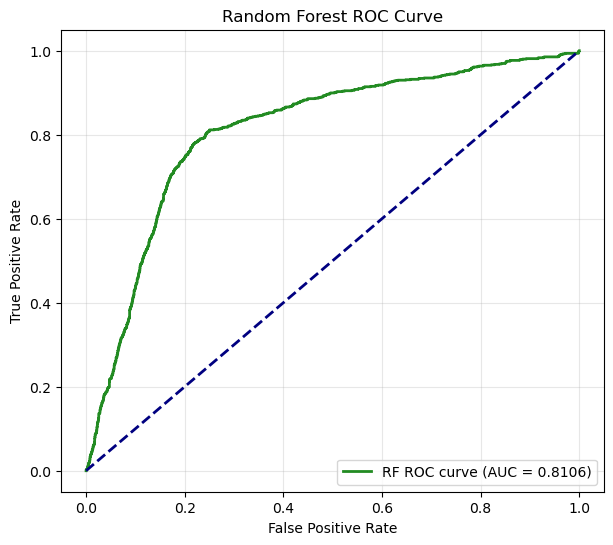

In [55]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_rf, tpr_rf, color='forestgreen', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

 ## **Performance Summary** :-

In [56]:
print("Best RF Parameters:", grid_rf.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

Best RF Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.76      0.83      2877
         1.0       0.53      0.79      0.63       955

    accuracy                           0.77      3832
   macro avg       0.72      0.78      0.73      3832
weighted avg       0.82      0.77      0.78      3832



## **XGBClassifier** :-

In [57]:
   # XGBoost (Balanced) - Added gamma and reg_lambda
best_xgb = XGBClassifier(max_depth=3, learning_rate=0.05, gamma=10, reg_lambda=100, random_state=42).fit(X_train_sm, y_train_sm)
best_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
     # 1. Define the Parameter Grid
     # Note: 'scale_pos_weight' helps with the imbalanced classes in your HR dataset
param_grid_xgb = {'n_estimators': [100, 200],'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5],'gamma': [0, 1, 5],'subsample': [0.8],'colsample_bytree': [0.8]}
param_grid_xgb

{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.05, 0.1],
 'max_depth': [3, 4, 5],
 'gamma': [0, 1, 5],
 'subsample': [0.8],
 'colsample_bytree': [0.8]}

In [59]:
       # 2. Initialize and Run GridSearch
        # use eval_metric='logloss' to avoid warnings
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_base

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [60]:
grid_xgb = GridSearchCV(xgb_base, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [61]:
grid_xgb.fit(X_train_final, y_train)
grid_xgb

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [62]:
#  Get the Best Model
best_xgb = grid_xgb.best_estimator_
best_xgb

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [63]:
y_pred_xgb = best_xgb.predict(X_val_final)
y_pred_xgb

array([0, 1, 0, ..., 0, 0, 0])

In [64]:
y_prob_xgb = best_xgb.predict_proba(X_val_final)[:, 1]
y_prob_xgb

array([0.05871078, 0.61475056, 0.06025739, ..., 0.14758377, 0.06064131,
       0.0552066 ], dtype=float32)

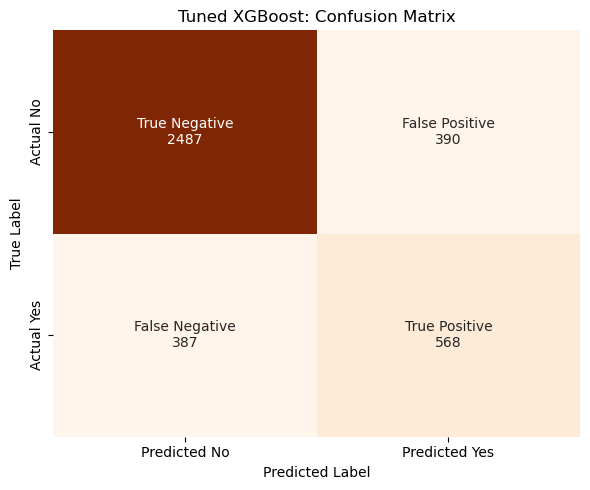

In [65]:
   # Confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

   # Cell labels
labels = np.array([
    ['True Negative', 'False Positive'],
    ['False Negative', 'True Positive']
])

# Combine labels + counts
annot_labels = np.array([
    [f'{labels[i,j]}\n{cm_xgb[i,j]}' for j in range(2)]
    for i in range(2)
])

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_xgb,
    annot=annot_labels,
    fmt='',
    cmap='Oranges',
    cbar=False,
    xticklabels=['Predicted No', 'Predicted Yes'],
    yticklabels=['Actual No', 'Actual Yes']
)

plt.title('Tuned XGBoost: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


 ##  **ROC-AUC Curve Plot :-**

In [66]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

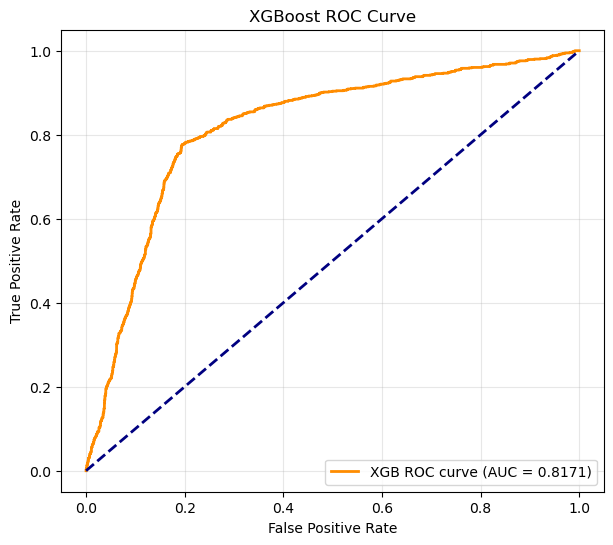

In [67]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGB ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## **Performance Summary** :-

In [68]:
print("Best XGB Parameters:", grid_xgb.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_xgb))

Best XGB Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      2877
         1.0       0.59      0.59      0.59       955

    accuracy                           0.80      3832
   macro avg       0.73      0.73      0.73      3832
weighted avg       0.80      0.80      0.80      3832



## **LGBMClassifier** :-


In [69]:
  # LightGBM (Balanced) - Small num_leaves is key
best_lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, num_leaves=15, max_depth=4, min_child_samples=100, random_state=42, verbosity=-1).fit(X_train_sm, y_train_sm)
best_lgbm

,boosting_type,'gbdt'
,num_leaves,15
,max_depth,4
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,100


In [70]:
  # Define the Parameter Grid
# We use small num_leaves and max_depth to keep the model simple and avoid overfitting
param_grid_lgbm = {'n_estimators': [100, 200],'learning_rate': [0.01, 0.05],'num_leaves': [15, 31],'max_depth': [4, 6],'min_child_samples': [20, 100],'importance_type': ['gain']}
param_grid_lgbm

{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.05],
 'num_leaves': [15, 31],
 'max_depth': [4, 6],
 'min_child_samples': [20, 100],
 'importance_type': ['gain']}

In [71]:
   # Initialize and Run GridSearch
   # 'verbosity': -1 reduces unnecessary logs during training
lgbm_base = LGBMClassifier(random_state=42, verbosity=-1)
lgbm_base

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [72]:
grid_lgbm = GridSearchCV(lgbm_base, param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lgbm

,estimator,LGBMClassifie... verbosity=-1)
,param_grid,"{'importance_type': ['gain'], 'learning_rate': [0.01, 0.05], 'max_depth': [4, 6], 'min_child_samples': [20, 100], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [73]:
grid_lgbm.fit(X_train_final, y_train)
grid_lgbm

,estimator,LGBMClassifie... verbosity=-1)
,param_grid,"{'importance_type': ['gain'], 'learning_rate': [0.01, 0.05], 'max_depth': [4, 6], 'min_child_samples': [20, 100], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [74]:
 # See the winning hyperparameters
print("Best Settings:", grid_lgbm.best_params_)

  #See the best score achieved
print("Best Cross-Val AUC:", grid_lgbm.best_score_)

 #Extract the best model for predictions
best_lgbm_model = grid_lgbm.best_estimator_
best_lgbm_model 

Best Settings: {'importance_type': 'gain', 'learning_rate': 0.05, 'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31}
Best Cross-Val AUC: 0.8003070945549233


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [75]:
 # Get the Best Model
best_lgbm = grid_lgbm.best_estimator_
best_lgbm

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,6
,learning_rate,0.05
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [76]:
y_pred_lgbm = best_lgbm.predict(X_val_final)
y_pred_lgbm

array([0., 1., 0., ..., 0., 0., 0.])

In [77]:
y_prob_lgbm = best_lgbm.predict_proba(X_val_final)[:, 1]
y_prob_lgbm

array([0.06126774, 0.67885153, 0.06708221, ..., 0.12388568, 0.04640479,
       0.05732034])

## **EVALUATION** :-

## **Confusion Matrix Plot** :-

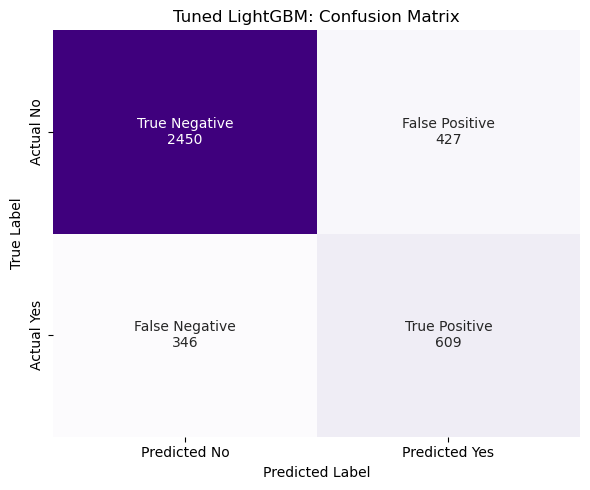

In [78]:

    # Confusion matrix
cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)

   # Cell labels
labels = np.array([
    ['True Negative', 'False Positive'],
    ['False Negative', 'True Positive']
])

   # Combine labels + counts
annot_labels = np.array([
    [f'{labels[i,j]}\n{cm_lgbm[i,j]}' for j in range(2)]
    for i in range(2)
])

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lgbm,
    annot=annot_labels,
    fmt='',
    cmap='Purples',
    cbar=False,
    xticklabels=['Predicted No', 'Predicted Yes'],
    yticklabels=['Actual No', 'Actual Yes']
)

plt.title('Tuned LightGBM: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## **ROC-AUC Curve Plot**  :-

In [79]:
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, y_prob_lgbm)
fpr_lgbm, tpr_lgbm, _

(array([0.00000000e+00, 0.00000000e+00, 3.47584289e-04, ...,
        9.96871741e-01, 9.96871741e-01, 1.00000000e+00]),
 array([0.        , 0.00104712, 0.00104712, ..., 0.99895288, 1.        ,
        1.        ]),
 array([       inf, 0.80342933, 0.80291808, ..., 0.04030956, 0.04002266,
        0.02969468]))

In [80]:
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)
roc_auc_lgbm

0.819258353396772

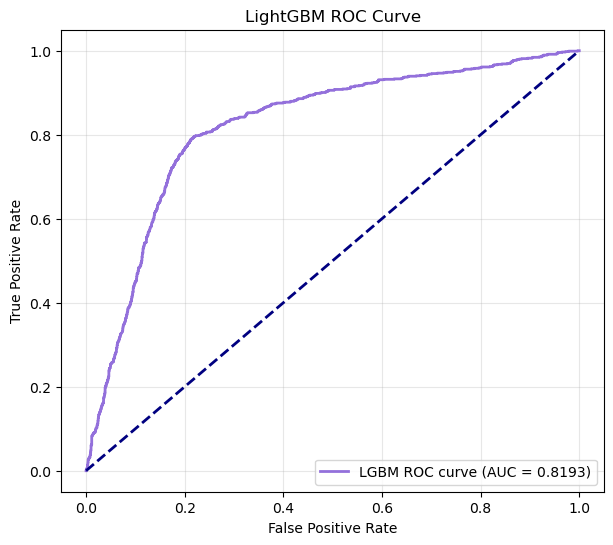

In [81]:
plt.figure(figsize=(7, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='mediumpurple', lw=2, label=f'LGBM ROC curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## **Performance Summary**:-

In [82]:
print("Best LGBM Parameters:", grid_lgbm.best_params_)
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lgbm))

Best LGBM Parameters: {'importance_type': 'gain', 'learning_rate': 0.05, 'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 31}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      2877
         1.0       0.59      0.64      0.61       955

    accuracy                           0.80      3832
   macro avg       0.73      0.74      0.74      3832
weighted avg       0.80      0.80      0.80      3832



In [83]:
def get_stats(name, model, X_t, y_t, X_v, y_v):
    # 1. Get Probabilities (for AUC)
    tr_probs = model.predict_proba(X_t)[:, 1]
    val_probs = model.predict_proba(X_v)[:, 1]
    
    # 2. Get Predictions (for Accuracy)
    tr_preds = model.predict(X_t)
    val_preds = model.predict(X_v)
    
    # 3. Calculate Scores
    tr_auc = roc_auc_score(y_t, tr_probs)
    val_auc = roc_auc_score(y_v, val_probs)
    tr_acc = accuracy_score(y_t, tr_preds)
    val_acc = accuracy_score(y_v, val_preds)
    
    return {
        "Model": name, 
        "Train AUC": round(tr_auc, 4), 
        "Val AUC": round(val_auc, 4), 
        "Train Acc": round(tr_acc, 4),
        "Val Acc": round(val_acc, 4),
        "Overfit Gap": round(tr_auc - val_auc, 4)
    }

# Generate the Summary Table
summary = pd.DataFrame([
    get_stats("LogReg", best_lr, X_train_sm, y_train_sm, X_val_final, y_val),
    get_stats("RF (Stable)", best_rf, X_train_sm, y_train_sm, X_val_final, y_val),
    get_stats("XGB (Stable)", best_xgb, X_train_sm, y_train_sm, X_val_final, y_val),
    get_stats("LGBM (Stable)", best_lgbm, X_train_sm, y_train_sm, X_val_final, y_val)
])

print(summary)

           Model  Train AUC  Val AUC  Train Acc  Val Acc  Overfit Gap
0         LogReg     0.7881   0.7883     0.6036   0.7706      -0.0002
1    RF (Stable)     0.8269   0.8106     0.7719   0.7706       0.0164
2   XGB (Stable)     0.8295   0.8171     0.7268   0.7972       0.0124
3  LGBM (Stable)     0.8458   0.8193     0.7512   0.7983       0.0266


In [84]:

def check_fit(model, X_train, y_train, X_val, y_val, name):
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]
    train_auc = roc_auc_score(y_train, train_probs)
    val_auc = roc_auc_score(y_val, val_probs)
    
# Calculate Accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    
    gap = train_auc - val_auc
    
    print(f"\n--- {name} Fit Check ---")
    print(f"Training AUC:   {train_auc:.4f}  |  Training Acc: {train_acc:.4f}")
    print(f"Validation AUC: {val_auc:.4f}  |  Validation Acc: {val_acc:.4f}")
    print(f"AUC Gap:        {gap:.4f}")
    
    if gap > 0.10:
        print("RESULT: 🚨 Serious Overfitting!")
    elif gap > 0.05:
        print("RESULT: ⚠️ Mild Overfitting.")
    elif train_auc < 0.60:
        print("RESULT: 📉 Underfitting.")
    else:
        print("RESULT: ✅ Good Fit!")
    print("-" * 50)

In [85]:
models_to_check = [
    (best_lr, "Logistic Regression"),
    (best_rf, "Random Forest"),
    (best_xgb, "XGBoost"),
    (best_lgbm, "LightGBM")
]

for model, name in models_to_check:
    # Use X_train_sm and y_train_sm to see the performance on your actual training data
    check_fit(model, X_train_sm, y_train_sm, X_val_final, y_val, name)


--- Logistic Regression Fit Check ---
Training AUC:   0.7881  |  Training Acc: 0.6036
Validation AUC: 0.7883  |  Validation Acc: 0.7706
AUC Gap:        -0.0002
RESULT: ✅ Good Fit!
--------------------------------------------------

--- Random Forest Fit Check ---
Training AUC:   0.8269  |  Training Acc: 0.7719
Validation AUC: 0.8106  |  Validation Acc: 0.7706
AUC Gap:        0.0164
RESULT: ✅ Good Fit!
--------------------------------------------------

--- XGBoost Fit Check ---
Training AUC:   0.8295  |  Training Acc: 0.7268
Validation AUC: 0.8171  |  Validation Acc: 0.7972
AUC Gap:        0.0124
RESULT: ✅ Good Fit!
--------------------------------------------------

--- LightGBM Fit Check ---
Training AUC:   0.8458  |  Training Acc: 0.7512
Validation AUC: 0.8193  |  Validation Acc: 0.7983
AUC Gap:        0.0266
RESULT: ✅ Good Fit!
--------------------------------------------------


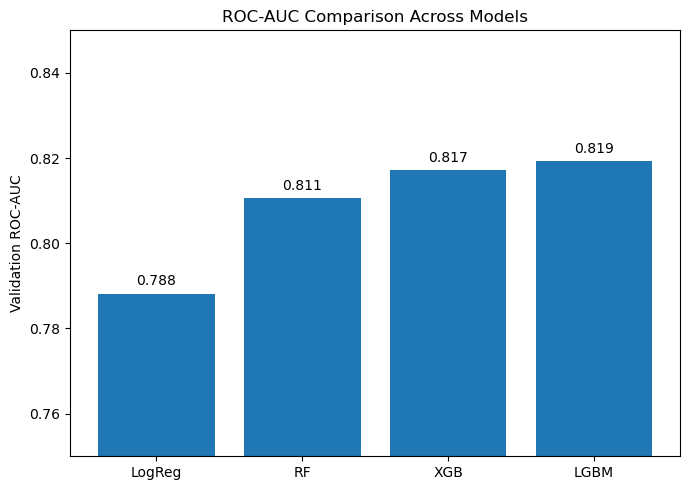

In [86]:
import matplotlib.pyplot as plt

models = ["LogReg", "RF", "XGB", "LGBM"]
val_auc = [0.7881, 0.8106, 0.8171, 0.8193]

plt.figure(figsize=(7, 5))
plt.bar(models, val_auc)
plt.ylabel("Validation ROC-AUC")
plt.title("ROC-AUC Comparison Across Models")
plt.ylim(0.75, 0.85)

for i, v in enumerate(val_auc):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


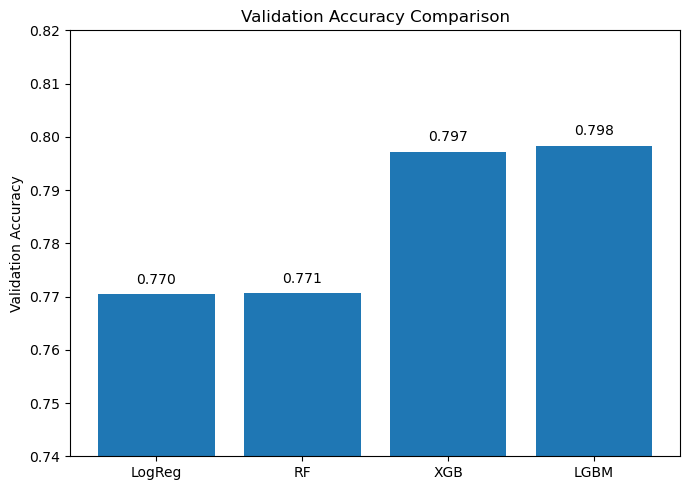

In [87]:
val_acc = [0.7704, 0.7706, 0.7972, 0.7983]

plt.figure(figsize=(7, 5))
plt.bar(models, val_acc)
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy Comparison")
plt.ylim(0.74, 0.82)

for i, v in enumerate(val_acc):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()


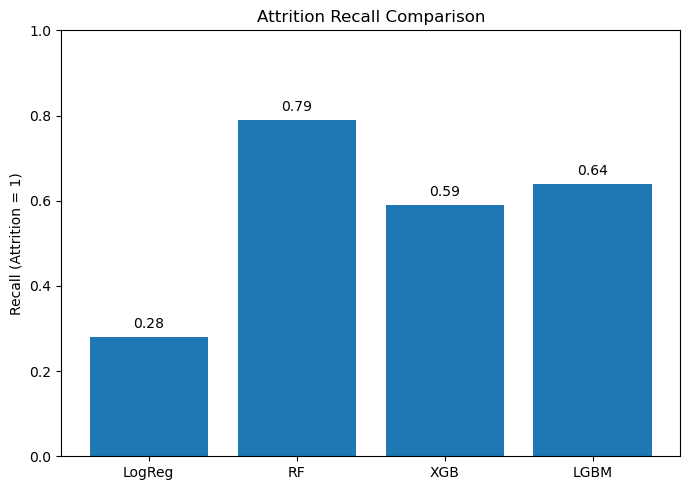

In [88]:
recall_attrition = [0.28, 0.79, 0.59, 0.64]

plt.figure(figsize=(7, 5))
plt.bar(models, recall_attrition)
plt.ylabel("Recall (Attrition = 1)")
plt.title("Attrition Recall Comparison")
plt.ylim(0, 1)

for i, v in enumerate(recall_attrition):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


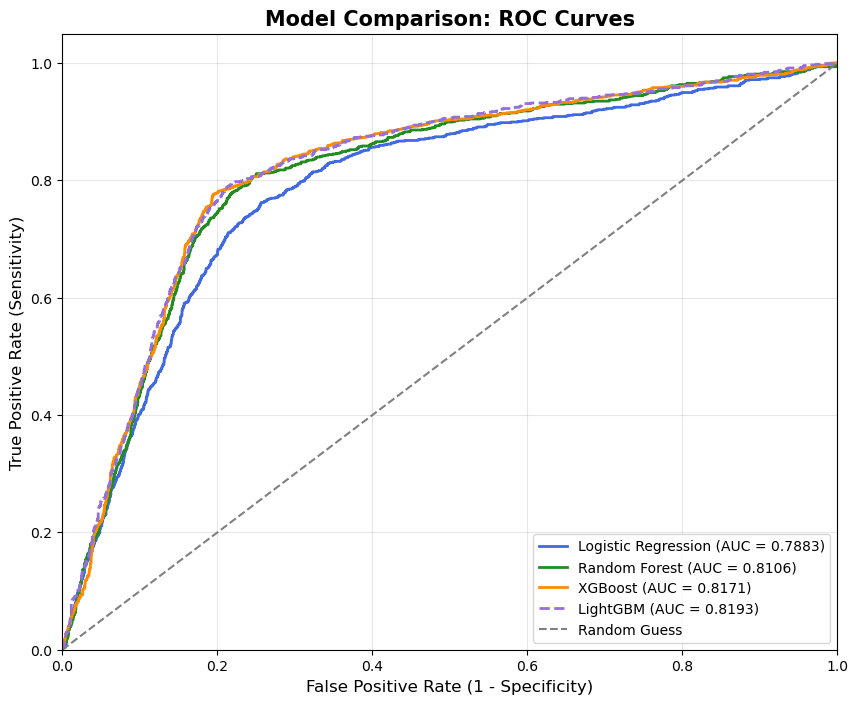

In [89]:
   # 1. Calculate probabilities for each model
lr_probs = best_lr.predict_proba(X_val_final)[:, 1]
rf_probs = best_rf.predict_proba(X_val_final)[:, 1]
xgb_probs = best_xgb.predict_proba(X_val_final)[:, 1]
lgbm_probs = best_lgbm.predict_proba(X_val_final)[:, 1]

   # 2. Compute ROC curve and AUC for each model
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_val, xgb_probs)
auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_val, lgbm_probs)
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

    # 3. Plotting the comparison
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})', color='royalblue', lw=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', color='forestgreen', lw=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})', color='darkorange', lw=2)
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {auc_lgbm:.4f})', color='mediumpurple', lw=2, linestyle='--')

    # Diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Model Comparison: ROC Curves', fontsize=15, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

    # Save and Show
plt.savefig('all_models_roc_comparison.png')
plt.show()

## **Test set Predictions** :-

In [90]:
test_data = encode_experience(test_data)
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,NaN,1.0,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,NaN,Pvt Ltd,1.0,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,0.0,NaN,Pvt Ltd,0.0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,NaN,Public Sector,4.0,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,NaN,NaN,2.0,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3.0,NaN,Pvt Ltd,0.0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7.0,100-500,Public Sector,1.0,84


In [91]:
test_data = test_data.copy()
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9.0,<10,NaN,1.0,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5.0,NaN,Pvt Ltd,1.0,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,0.0,NaN,Pvt Ltd,0.0,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11.0,10/49,Pvt Ltd,1.0,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16.0,NaN,Public Sector,4.0,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18.0,NaN,NaN,2.0,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3.0,NaN,Pvt Ltd,0.0,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7.0,100-500,Public Sector,1.0,84


In [92]:
   # Apply cleaning and transformers (No Fitting!)
for col in cat_features:
    test_data[col] = (test_data[col].astype(str).str.replace('<', 'less_', regex=False).str.replace('>', 'greater_', regex=False).str.replace('never', '0', regex=False).str.replace('+', '', regex=False).str.replace(' ', '_', regex=False))

In [93]:
test_data_cat = cat_imputer.transform(test_data[cat_features])
test_data_cat

array([['Male', 'Has_relevent_experience', 'Full_time_course', ...,
        'STEM', 'less_10', 'nan'],
       ['Female', 'Has_relevent_experience', 'no_enrollment', ...,
        'STEM', 'nan', 'Pvt_Ltd'],
       ['Male', 'No_relevent_experience', 'no_enrollment', ..., 'nan',
        'nan', 'Pvt_Ltd'],
       ...,
       ['Male', 'No_relevent_experience', 'no_enrollment', ..., 'nan',
        'nan', 'Pvt_Ltd'],
       ['Male', 'Has_relevent_experience', 'Full_time_course', ...,
        'nan', '100-500', 'Public_Sector'],
       ['Male', 'Has_relevent_experience', 'no_enrollment', ..., 'STEM',
        '10000', 'Pvt_Ltd']], dtype=object)

In [94]:
test_data_num = num_imputer.transform(test_data[num_features])
test_data_num

array([[ 0.827,  9.   ,  1.   , 21.   ],
       [ 0.92 ,  5.   ,  1.   , 98.   ],
       [ 0.624,  0.   ,  0.   , 15.   ],
       ...,
       [ 0.887,  3.   ,  0.   , 18.   ],
       [ 0.804,  7.   ,  1.   , 84.   ],
       [ 0.804, 15.   ,  2.   , 11.   ]])

In [95]:
test_data_encoded = encoder.transform(test_data_cat)
test_data_encoded 

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [96]:
test_data_final = pd.concat([pd.DataFrame(test_data_num, columns=num_features, index=test_data.index), pd.DataFrame(test_data_encoded, columns=encoder.get_feature_names_out(), index=test_data.index)], axis=1)
test_data_final

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
0,0.827,9.0,1.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.920,5.0,1.0,98.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.624,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.827,11.0,1.0,39.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.920,21.0,5.0,72.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,16.0,4.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2125,0.897,18.0,2.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2126,0.887,3.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2127,0.804,7.0,1.0,84.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
test_data_final = clean_feature_names(test_data_final)
test_data_final

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
0,0.827,9.0,1.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.920,5.0,1.0,98.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.624,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.827,11.0,1.0,39.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.920,21.0,5.0,72.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,16.0,4.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2125,0.897,18.0,2.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2126,0.887,3.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2127,0.804,7.0,1.0,84.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
test_data_final = test_data_final.reindex( columns=X_train_sm.columns,fill_value=0)
test_data_final

,city_development_index,experience,last_new_job,training_hours,gender_Female,gender_Male,gender_Other,gender_nan,relevent_experience_Has_relevent_experience,relevent_experience_No_relevent_experience,...,company_size_5000-9999,company_size_less_10,company_size_nan,company_type_Early_Stage_Startup,company_type_Funded_Startup,company_type_NGO,company_type_Other,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan
0,0.827,9.0,1.0,21.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.920,5.0,1.0,98.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.624,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.827,11.0,1.0,39.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.920,21.0,5.0,72.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.920,16.0,4.0,15.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2125,0.897,18.0,2.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2126,0.887,3.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2127,0.804,7.0,1.0,84.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
test_data_final[num_features] = scaler.transform(test_data_final[num_features])
test_data_final[num_features]

,city_development_index,experience,last_new_job,training_hours
0,-0.021725,-0.165635,-0.597656,-0.739018
1,0.734358,-0.755155,-0.597656,0.545059
2,-1.672102,-1.492056,-1.198685,-0.839076
3,-0.021725,0.129126,-0.597656,-0.438844
4,0.734358,1.602927,1.806460,0.111474
...,...,...,...,...
2124,0.734358,0.866026,1.205431,-0.839076
2125,0.547370,1.160787,0.003373,-0.588931
2126,0.466071,-1.049915,-1.198685,-0.789047
2127,-0.208714,-0.460395,-0.597656,0.311590


In [100]:
  # Generate Final Submission (Using Balanced LightGBM )
probs = best_lgbm.predict_proba(test_data_final)[:, 1]
submission = pd.DataFrame({"enrollee_id": test_data["enrollee_id"], "target": probs})
submission.to_csv("submission.csv", index=False)
print("✅ Final balanced submission saved to submission.csv")

✅ Final balanced submission saved to submission.csv


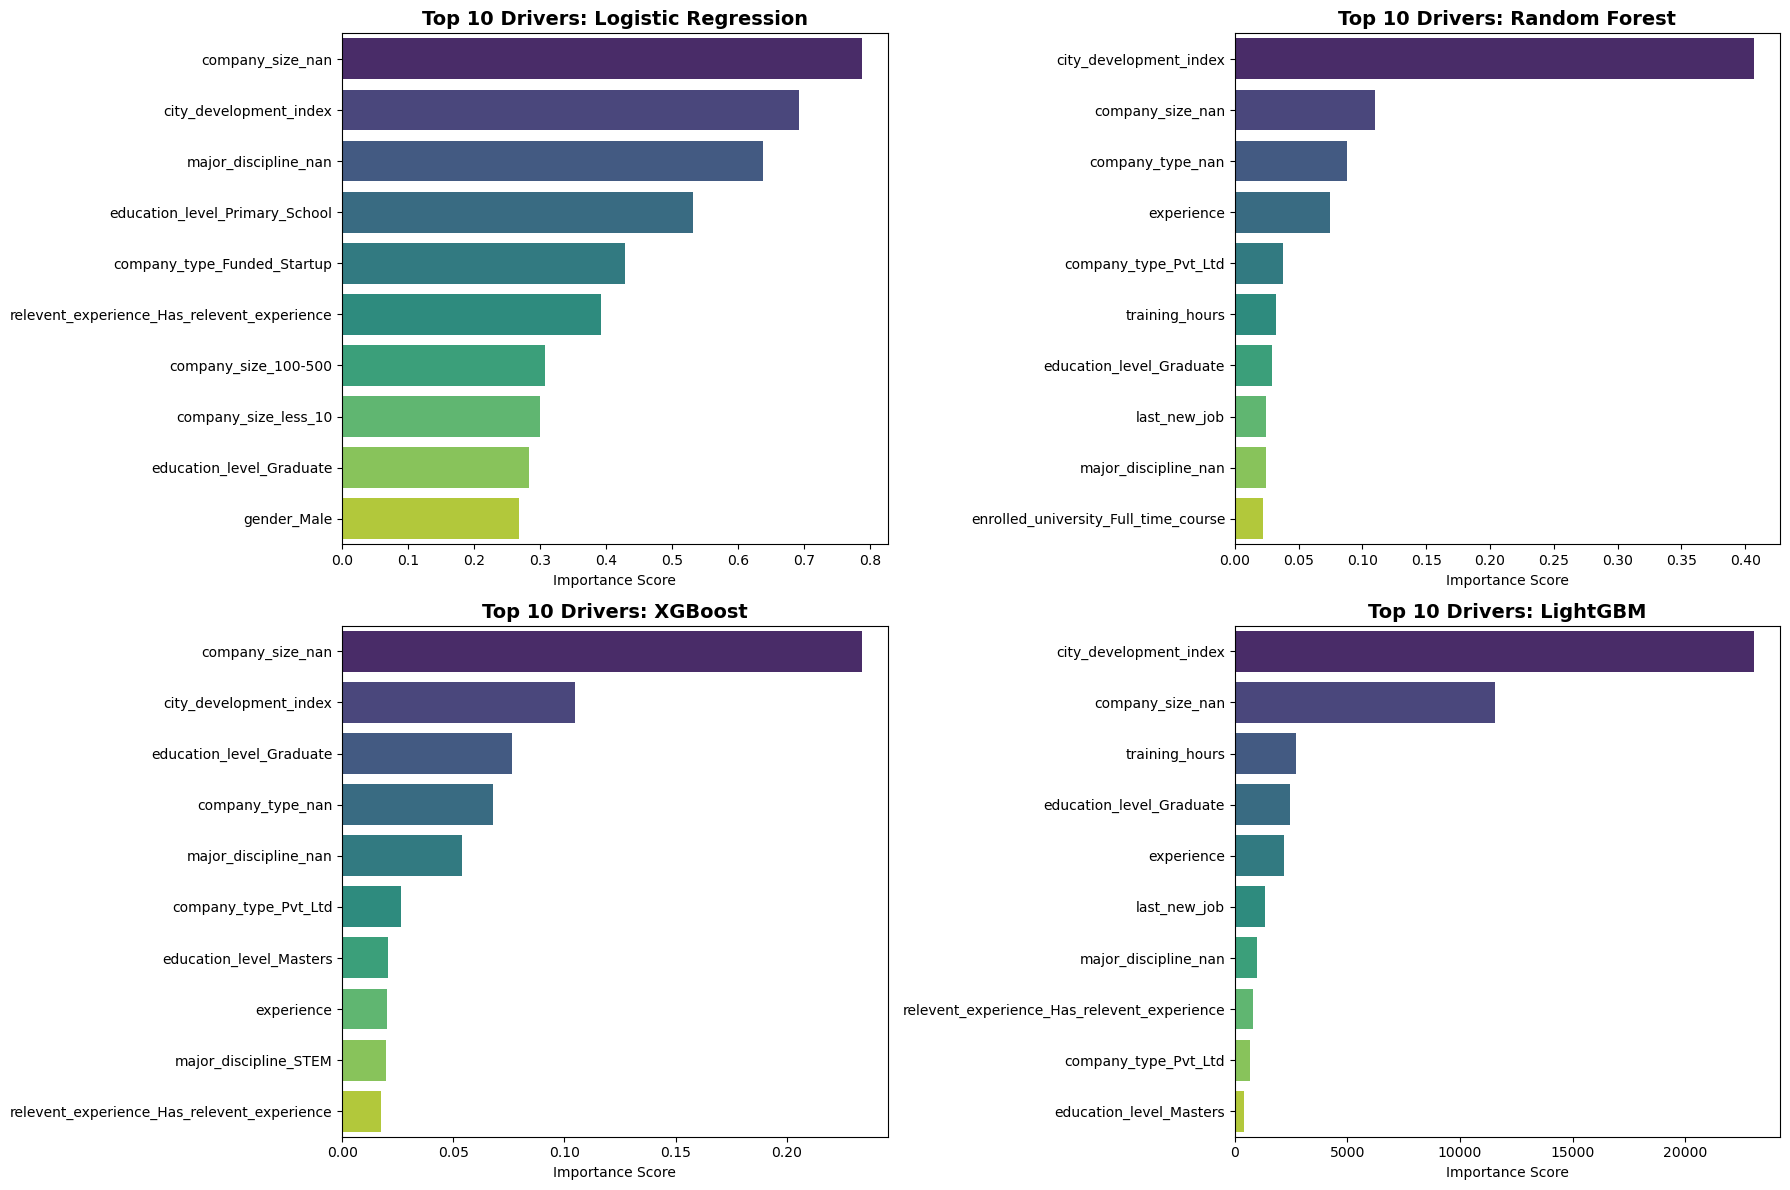

In [101]:
# Define a function to get importance/coefficients :-
def get_top_features(model, model_name, feature_names):
    if model_name == "Logistic Regression":
        # For LR, we use absolute coefficients
        importance = np.abs(model.coef_[0])
    else:
        # For RF, XGB, and LGBM, we use feature_importances_
        importance = model.feature_importances_
    
    df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    return df.sort_values(by='Importance', ascending=False).head(10)

# Setup the 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.6)

models = [
    (best_lr, "Logistic Regression"),
    (best_rf, "Random Forest"),
    (best_xgb, "XGBoost"),
    (best_lgbm, "LightGBM")
]

# Plot each model
for i, (model, name) in enumerate(models):
    ax = axes[i//2, i%2]
    top_features = get_top_features(model, name, X_train_sm.columns)
    
    sns.barplot(x='Importance', y='Feature', data=top_features, ax=ax, palette='viridis')
    ax.set_title(f'Top 10 Drivers: {name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Importance Score')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [103]:
final_model = best_lgbm


In [104]:
import pickle

# Save model
pickle.dump(final_model, open("best_lgbm.pkl", "wb"))

# Save preprocessors
pickle.dump(cat_imputer, open("cat_imputer.pkl", "wb"))
pickle.dump(num_imputer, open("num_imputer.pkl", "wb"))
pickle.dump(encoder, open("encoder.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

# Save final feature columns (VERY IMPORTANT)
pickle.dump(X_train_sm.columns.tolist(), open("train_columns.pkl", "wb"))

print("✅ All deployment artifacts saved successfully!")


✅ All deployment artifacts saved successfully!


In [105]:
pickle.dump(list(cat_features), open("cat_features.pkl", "wb"))
pickle.dump(list(num_features), open("num_features.pkl", "wb"))


In [106]:
 # Reload everything to confirm deployment safety
model = pickle.load(open("best_lgbm.pkl", "rb"))
cat_imputer = pickle.load(open("cat_imputer.pkl", "rb"))
num_imputer = pickle.load(open("num_imputer.pkl", "rb"))
encoder = pickle.load(open("encoder.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
train_columns = pickle.load(open("train_columns.pkl", "rb"))

print("Model loaded:", type(model))
print("Total features expected:", len(train_columns))


Model loaded: <class 'lightgbm.sklearn.LGBMClassifier'>
Total features expected: 43


In [113]:
   # Create the final dashboard dataset
   # We use the original train_data but attach our best model's predictions
X_all_processed = X_train_final.copy() # Using the processed features
all_probs = best_lgbm.predict_proba(X_all_processed)[:, 1]

    # Link back to original IDs and Categories
dashboard_df = train_data.loc[X_train_final.index].copy()
dashboard_df['Risk_Score'] = (all_probs * 100).round(2)

    # Create a clear Risk Level for filtering
dashboard_df['Risk_Level'] = pd.cut(dashboard_df['Risk_Score'], 
                                    bins=[0, 30, 70, 100], 
                                    labels=['Low Risk', 'Medium Risk', 'High Risk'])

    # Save it!
dashboard_df.to_csv("HR_Dashboard_Data.csv", index=False)
print("File 'HR_Dashboard_Data.csv' is ready for Power BI!")

File 'HR_Dashboard_Data.csv' is ready for Power BI!
